# 서울시 CCTV현황 분석 및 인구 현황 분석

## CCTV 설치 현황

In [2]:
import pandas as pd

In [3]:
CCTV_Seoul = pd.read_excel('../Data/CCTV_in_Seoul_2018.xlsx')
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [4]:
CCTV_Seoul.tail()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


In [5]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [6]:
# CCTV_Seoul의 첫번째 컬럼 확인
CCTV_Seoul.columns[0]

'기관명'

In [7]:
# 기관명 -> 구별 로 변경
CCTV_Seoul.rename( columns= {'기관명':'구별'} , inplace=True)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [8]:
# NaN을 확인하고 NaN을 0 으로 대체하기
CCTV_Seoul.isna().sum()

CCTV_Seoul.fillna(0 , inplace= True)

In [9]:
CCTV_Seoul.isna().sum()

구별          0
소계          0
2011년 이전    0
2012년       0
2013년       0
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
dtype: int64

---
## 인구현황 데이터

In [10]:
pop_seoul = pd.read_excel('../Data/population_in_Seoul_2020.xlsx', 
                            header=3 ,
                            usecols="B,D,G,J,N",
)
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [11]:
# 컬럼 이름 변경
# pop_seoul.rename(columns={'자치구':'구별' , '계':'인구수' ,'계.1':'한국인' ,'계.2':'외국인' ,'65세이상고령자':'고령자' } ,  inplace=True)
pop_seoul.columns = ['구별','인구수','한국인','외국인','고령자']
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [12]:
# 합계 열 없애기
pop_seoul.drop(index=0 , inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


## CCTV 현황

In [13]:
# CCTV에서 소계로 오름차순 정렬
CCTV_Seoul.sort_values(by='소계' , ascending=True).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328


> CCTV 댓수가 적은 지역으로는 도봉구 , 중랑구, 강북구, 종로구, 중구 순이다.

In [14]:
# CCTV에서 소계로 내림차순 정렬
CCTV_Seoul.sort_values(by='소계' , ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


> CCTV 댓수가 많은 지역으로는 강남구, 관악구, 구로구, 성북구, 은평구 순이다.

### 최근 3년간 CCTV 증가율  

In [15]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul.loc[:,'2016년':'2018년'].sum(axis=1)) / (CCTV_Seoul.loc[:,'2011년 이전':'2015년'].sum(axis=1)) * 100

# CCTV_Seoul['최근증가율'] =  CCTV_Seoul.iloc[:,7:10].sum(axis=1) / CCTV_Seoul.iloc[:,2:7].sum(axis=1) * 100
CCTV_Seoul.sort_values('최근증가율' , ascending= False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


> 결과를 보면 최근 3년간의 CCTV가 2015년 이전에 비해 가장 많이 증가한 곳은 중구, 영등포구, 성동구, 금천구, 광진구 순이다.

---
## 인구현황

In [16]:
# 구별 Data의 유효성 확인
len(pop_seoul['구별'].unique())

25

In [17]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


In [18]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228
5,광진구,365990,350417,15573,48989,4.255034,13.385338


In [19]:
# 인구수가 제일 많은 지역 Top5
pop_seoul.sort_values('인구수' , ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
23,강남구,549898,544804,5094,72602,0.926354,13.202812
11,노원구,535495,531037,4458,82682,0.832501,15.440294
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [20]:
# 외국인이 제일 많은 지역 Top5
pop_seoul.sort_values('외국인' , ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
17,구로구,438308,405837,32471,67432,7.408261,15.384615
18,금천구,251370,232583,18787,38508,7.473843,15.319251
21,관악구,516662,499374,17288,76664,3.346095,14.838328
6,동대문구,362793,346156,16637,60367,4.585811,16.639516


In [21]:
# 외국인 비율이 높은 지역 Top5
pop_seoul.sort_values('외국인비율' , ascending=False).head()
# 중구 외교관 가족들이 많음, 영등포구 중국인 많음

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
2,중구,136469,126175,10294,23794,7.543105,17.435462
18,금천구,251370,232583,18787,38508,7.473843,15.319251
17,구로구,438308,405837,32471,67432,7.408261,15.384615
3,용산구,246165,229579,16586,39439,6.737757,16.021368


In [22]:
# 고령자수가 제일 많은 지역 Top5
pop_seoul.sort_values('고령자' , ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
11,노원구,535495,531037,4458,82682,0.832501,15.440294
12,은평구,482509,478019,4490,82245,0.930553,17.045278
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [23]:
# 고령자 비율 정렬
pop_seoul.sort_values('고령자비율' , ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,316750,312985,3765,61660,1.188635,19.466456
10,도봉구,333495,331238,2257,60023,0.676772,17.998171
2,중구,136469,126175,10294,23794,7.543105,17.435462
1,종로구,161984,151217,10767,28073,6.646953,17.330724
12,은평구,482509,478019,4490,82245,0.930553,17.045278


- 인구수 제일 많은 지역 : 송파구 강서구 강남구 노원구 관악구
- 외국인이 제일 많은 지역: 영등포구 구로구 금천구 관악구 동대문구
- 외국인 비율이 높은 지역 : 영등포구 중주 금천구 구로구 용산구
- 고령자 제일 많은 지역 : 송파구 강서구 노원구 은평구 관악구
- 고령자 비율이 높은 지역 : 강북구 도봉구 중구 종로구 은평구

강사님 풀이     
인구수가 제일 많은 지역은 송파구 이지만 영등포구가 제일 외국인이 많다.  
그리고 그 근처라고 할 수 있는 구로구, 금천구 등도 굉장히 외국인이 많다. (지역과 관련이 있다)    
송파구는 고령자가 제일 많지만 고령자의 비율이 높지 않은것이 확인된다.   
하지만 강북구, 도봉구, 중구, 종로구, 은평구 같은 경우는     
인구수 대비 고령자 비율이 많기 때문에 추후 "고령화"가 우려된다. (결론)  

- 우리조의 삽질     

고령자 수랑 고령자 비율은 상관관계가 없어 보인다.

인구가 많을 수록 고령자의 수도 많다 (비율 무관)

고령자가 비율이 높은 지역은 강북에 쏠려있다. 
-> 먼저 개발되어있던 강북 쪽에 한국인이 이주하지 않고 지내며 고령화,  

강남 주변 인프라와 회사가 많기 때문에
-> 들어오는 사람도 계속 생기고, 나가는 사람은 적다 
-> 땅 덩어리가 크다
-> 외곽지역은 경기도와 가까워 인구수가 많다,,,? 

-> 강서구쪽 지역 집값이 저렴해 외국인(중국인)들이 많이 거주 : 영등포구 구로구 금천구
-> 용산구는 미군부대, 중구는 대사관 (외교관 가족)

---
# CCTV와 인구현황 합치기

In [24]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228
5,광진구,365990,350417,15573,48989,4.255034,13.385338


In [25]:
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425


In [26]:
data_result = pd.merge(CCTV_Seoul, pop_seoul , on='구별')
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [27]:
data_result.drop( data_result.columns[2:10] , axis= 1).head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [28]:
# 범위가 많으면 쓰기 좋은 방법
delColumn = data_result.columns[2:10]

for i in delColumn:
    del data_result[i]
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [29]:
data_result.set_index('구별' , inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [30]:
import numpy as np

In [31]:
# 고령자 비율과 소계(cctv)의 상관계수
np.corrcoef(data_result['고령자비율'] , data_result['소계'])
# 고령자 비율이 낮은쪽에 cctv가 많다

array([[ 1.        , -0.44225083],
       [-0.44225083,  1.        ]])

In [32]:
# 고령자와 소계(cctv)의 상관계수
np.corrcoef(data_result['고령자'] , data_result['소계'])

array([[1.        , 0.28638538],
       [0.28638538, 1.        ]])

In [33]:
# 외국인 비율과 소계(cctv)의 상관계수
np.corrcoef(data_result['외국인비율'] , data_result['소계'])

array([[ 1.        , -0.06215538],
       [-0.06215538,  1.        ]])

In [34]:
# 외국인과 소계(cctv)의 상관계수
np.corrcoef(data_result['외국인'] , data_result['소계'])

array([[1.        , 0.17444235],
       [0.17444235, 1.        ]])

In [35]:
# 인구수와 소계(cctv)의 상관계수
np.corrcoef(data_result['인구수'] , data_result['소계'])
# 인구수와 양의 상관관계
# 인구수가 많아지면 cctv가 많아지는 경향을 보인다.
# 외국인과는 아무런 상관관계가 없다

array([[1.        , 0.38064812],
       [0.38064812, 1.        ]])

> 고령자 비율의 상관계수를 보면 역상관이 발생하고 이는 고령자가 아닌 젊은 층 비율이 높은 곳에 CCTV가 많이 설치되는 경향을 보이며     
> 주로 인구수와 양의 상관을 보이고 있어 CCTV 댓수는 인구수에 비례하여 증가하는 경향을 보인다.

In [ ]:
# save as CCTV_Result.csv
data_result.to_csv("../Data/CCTV_Result.csv", encoding="utf-8")

<AxesSubplot:title={'center':'CCTV소계'}, ylabel='구별'>

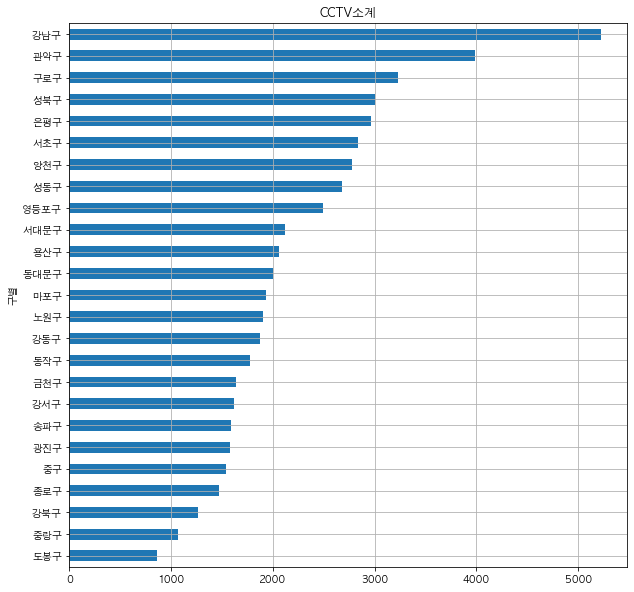

In [36]:
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 소계 bar chart
data_result['소계'].sort_values().plot(kind='barh', figsize=(10, 10), title='CCTV소계', grid=True)

<AxesSubplot:title={'center':'인구수'}, ylabel='구별'>

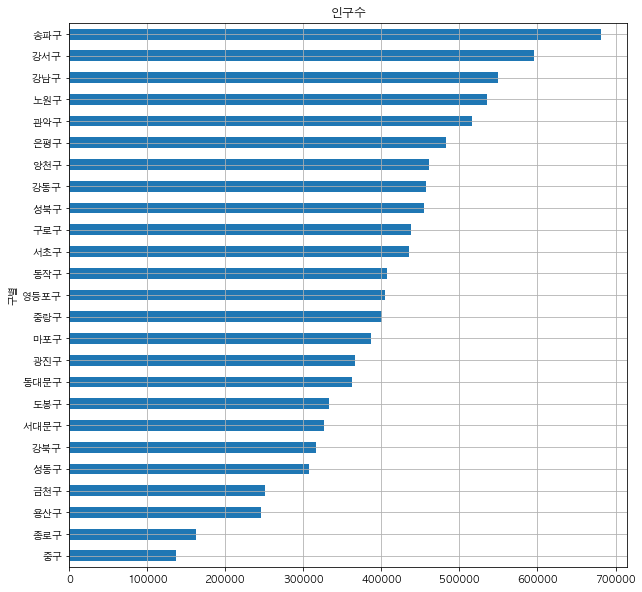

In [37]:
# 인구수 bar chart
data_result['인구수'].sort_values().plot(kind='barh', figsize=(10, 10), title='인구수', grid=True)

### 인구대비 CCTV 비율

<AxesSubplot:title={'center':'CCTV소계 : 인구수 비율'}, ylabel='구별'>

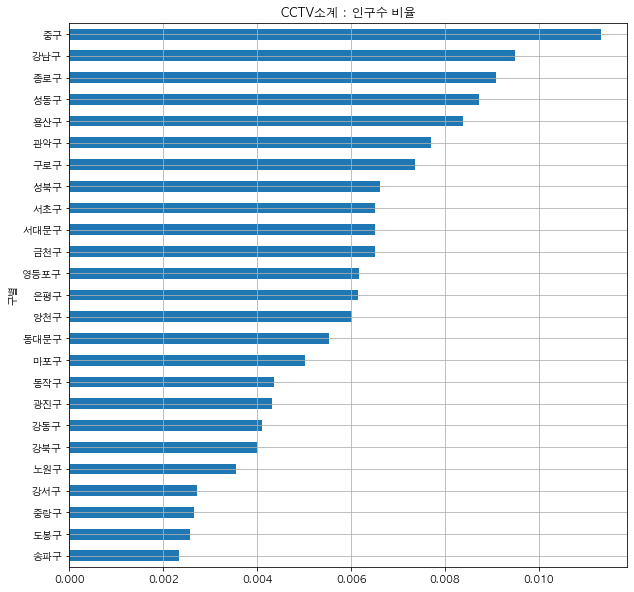

In [38]:
data_result.head()

data_소계_인구수 = data_result.소계 / data_result.인구수
data_소계_인구수.sort_values().plot(kind='barh', figsize=(10, 10), title='CCTV소계 : 인구수 비율', grid=True)

-0.44225082573365776

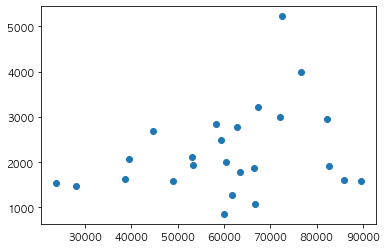

In [39]:
#고령자 / 소계 scatter plot
plt.scatter(data_result['고령자'], data_result['소계'])
# 고령자/소계 correlation
data_result['고령자'].corr(data_result['소계'])
# 고령자비율 / 소계 correlation
data_result['고령자비율'].corr(data_result['소계'])

Text(0, 0.5, 'CCTV')

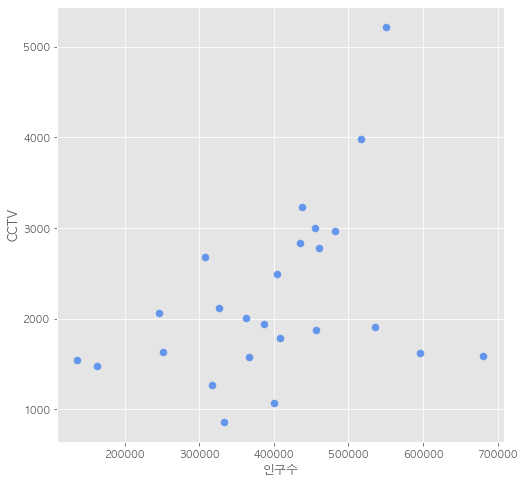

In [40]:
# applegothic 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
# plt style
plt.style.use('ggplot')
# plt size
plt.figure(figsize=(8, 8))

# 인구수 / 소계 scatter plot
plt.scatter(data_result['인구수'], data_result['소계'], color='cornflowerblue', s=50)

# xlabel
plt.xlabel('인구수')
# ylabel
plt.ylabel('CCTV')

- 인구수 대비 CCTV 비율 TOP 5는 '중구, 강남구, 종로구, 성동구, 용산구' 이다
- 인구수 대비 CCTV 비율 -TOP 4는 '송파구, 도봉구, 중랑구, 강서구' 이다
- 고령화가 우려되는 지역들은 CCTV 대수가 적다
- 젊은이(Not 고령자) 비율이 높을 수록 CCTV 대수가 많다
- 젊은 것들이 문제다

 
0.002885 x + 1064


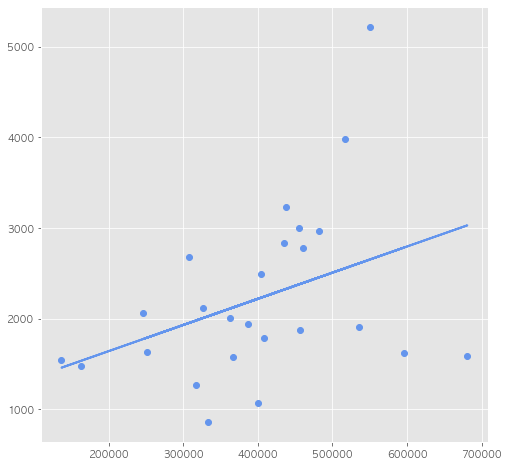

In [41]:
import numpy as np
# 인구수, 소계 회귀선, 평균선 만들기

# plt size
plt.figure(figsize=(8, 8))

plt.plot(data_result['인구수'], data_result['소계'], 'o', color='cornflowerblue')
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
f1 = np.poly1d(fp1)
print(f1)
# 회귀선 만들기
plt.plot(data_result['인구수'], f1(data_result['인구수']), color='cornflowerblue', linewidth=2)

> CCTV 댓수의 기준선

In [42]:
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
# sort descending
data_result = data_result.sort_values(by='오차', ascending=False)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,2570.380612
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,1442.540920
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,1430.274035
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,1168.247488
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,1165.777237


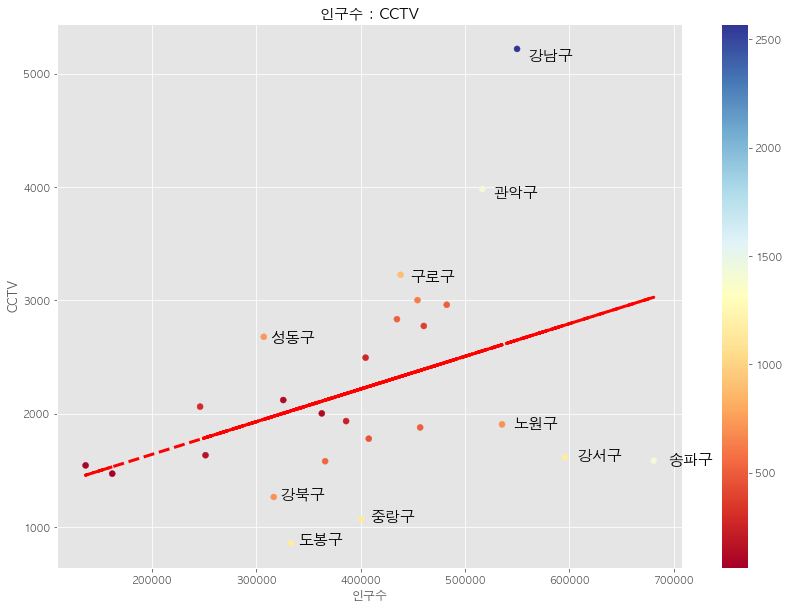

In [43]:
plt.figure(figsize=(14, 10))
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'], cmap='RdYlBu')
# 기준선
fx = data_result['인구수']
plt.plot(fx, f1(fx), color='red', linewidth=3, linestyle='dashed')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.title('인구수 : CCTV')
plt.colorbar()

# 오차가 가장 큰 10개 구에 텍스트 붙이기
for i in range(10):
    plt.text(data_result['인구수'][i]*1.02, data_result['소계'][i]*0.98, data_result.index[i], size=15)

---